<h1 style="text-align: center;"> BCSE417P Lab Assignment 4</h1>

#### Student Information

**Name:** Swarab Raul  
**Registration Number:** 21BAI1225  
**Date:** Novemeber 15, 2024

#### GitHub Repository

- [Swarab Raul's GitHub Repository](https://github.com/SwarabRaul/MV_Assignment4)

---

In [9]:
import cv2
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

In [10]:
# Load the video
video_path = './video2.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise Exception("Error: Cannot open video")
else:
    print("Video loaded successfully")

Video loaded successfully


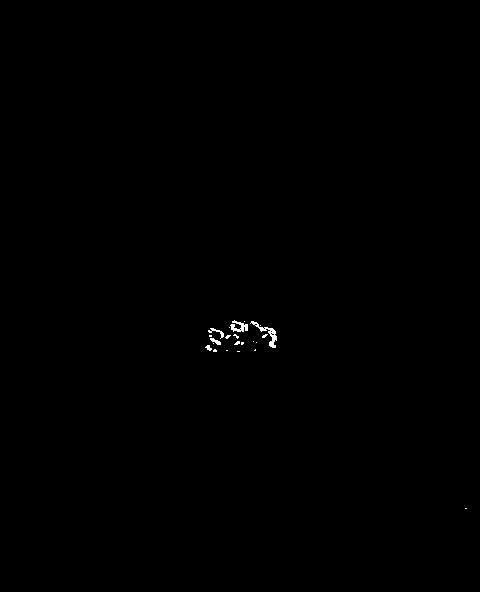

In [11]:
motion_threshold = 0.5  # Threshold for histogram similarity
difference_threshold = 25  # Pixel intensity threshold for frame differencing

event_frames = []
frame_count = 0

while cap.isOpened():
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()
    frame_count += 1

    if not ret or frame2 is None:
        break

    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    diff = cv2.absdiff(gray1, gray2)
    _, motion_mask = cv2.threshold(diff, difference_threshold, 255, cv2.THRESH_BINARY)

    hist1 = cv2.calcHist([gray1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([gray2], [0], None, [256], [0, 256])
    hist_similarity = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

    if hist_similarity < motion_threshold or cv2.countNonZero(motion_mask) > 1000:
        event_frames.append(frame_count)
        timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        print(f"Event detected at {timestamp:.2f} seconds")

    motion_mask_rgb = cv2.cvtColor(motion_mask, cv2.COLOR_GRAY2RGB)
    motion_image = Image.fromarray(motion_mask_rgb)

    clear_output(wait=True)
    display(motion_image)

cap.release()

In [12]:
# Reload video to save results
cap = cv2.VideoCapture(video_path)

# Define VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = None  # Initialize video writer
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    frame_count += 1

    if not ret or frame is None:
        break

    # Annotate frames with detected events
    if frame_count in event_frames:
        timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        cv2.putText(frame, f"Event Detected at {timestamp:.2f}s", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Initialize VideoWriter
    if out is None:
        height, width = frame.shape[:2]
        out = cv2.VideoWriter('output.avi', fourcc, 20.0, (width, height))

    # Write the frame to the output video
    out.write(frame)

cap.release()
if out is not None:
    out.release()

print("Annotated video saved as 'output.avi'")

Annotated video saved as 'output.avi'


In [13]:
# Display detected events
if event_frames:
    print("Events were detected at the following frames:", event_frames)
else:
    print("No significant events were detected.")

Events were detected at the following frames: [1, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 43, 46, 48, 49, 50, 51, 53, 54, 56, 58, 59, 60, 61, 63, 64, 65, 66, 68, 103, 104, 105, 106, 111, 113, 114, 115, 116, 118, 119, 121, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 138, 139, 140, 141, 143, 144, 153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 165, 166, 168, 169, 170, 171, 173, 174, 175, 176, 178, 179, 180, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 203, 204, 205, 206, 208, 209, 210, 211, 213, 214, 215, 216, 218, 219, 220, 221, 223, 224, 225, 226, 228, 229, 230, 231, 233, 234, 236, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 253, 254, 255, 256, 258, 259, 260, 261, 263, 264, 265, 266, 268, 269, 270, 271, 273, 274, 275, 276, 278, 279, 280, 281, 283, 284, 285, 286, 288, 289, 290, 291, 293, 294, 295, 296, 298, 299, 300, 301, 303, 3